In [ ]:
import pandas as pd
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/internet_ads/ad.data', header=None)
data

/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,0,1,2,3,4,5,6,7,8,9,...,1549,1550,1551,1552,1553,1554,1555,1556,1557,1558
0,125,125,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
1,57,468,8.2105,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
2,33,230,6.9696,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
3,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
4,60,468,7.8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,ad.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3274,170,94,0.5529,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3275,101,140,1.3861,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3276,23,120,5.2173,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.
3277,?,?,?,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,nonad.


In [ ]:
data.columns=data.columns.astype('int')

In [ ]:
data.dtypes.head(3)

0    object
1    object
2    object
dtype: object

In [ ]:
newdf=data.iloc[:,[0,1,2,3]]
newdf

,0,1,2,3
0,125,125,1.0,1
1,57,468,8.2105,1
2,33,230,6.9696,1
3,60,468,7.8,1
4,60,468,7.8,1
...,...,...,...,...
3274,170,94,0.5529,0
3275,101,140,1.3861,1
3276,23,120,5.2173,1
3277,?,?,?,1


AxesSubplot(0.125,0.125;0.775x0.755)


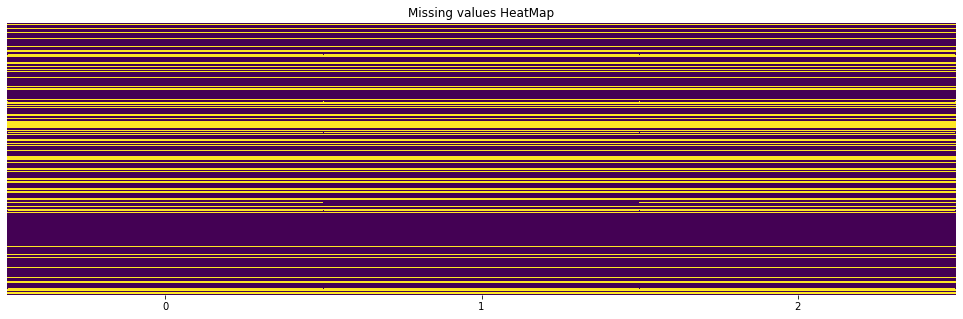

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

newdf=data.iloc[:,[0,1,2]]
newdf=newdf.applymap(lambda x:'?' in x)
plt.figure(figsize=(17,5))
plt.title("Missing values HeatMap")
print(sns.heatmap(newdf,cbar=False,yticklabels=False,cmap='viridis'))

In [ ]:
for i in (newdf):
    print('column['+str(i)+'] has missing values -'+str(sum(newdf[i])))

column[0] has missing values -903
column[1] has missing values -901
column[2] has missing values -910


In [ ]:
def replace_missing(df):
    for i in df:
        df[i]=df[i].replace('[?]',np.NAN,regex=True).astype('float')
        df[i]=df[i].fillna(df[i].mean())
    return df

In [ ]:
import numpy as np
data[[0,1,2,3]]=replace_missing(data.iloc[:,[0,1,2,3]].copy()).values
data[3]=data[3].apply(lambda x:round(x))

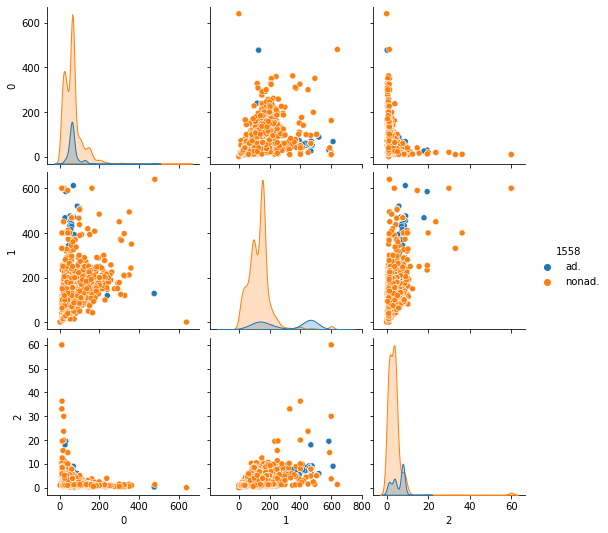

In [ ]:
sns.pairplot(data=data.iloc[:,[0,1,2,-1]],hue=1558)
plt.show()

In [ ]:
data.iloc[:,-1]=data.iloc[:,-1].replace(['ad.','nonad.'],[1,0])

In [ ]:
x=data.iloc[:,:-1]
y=data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
x=scaled.fit_transform(x)

In [ ]:
df1 = pd.DataFrame(x)[[0,1,2,3]]
df1[1558] = y

0    2820
1     459
Name: 1558, dtype: int64


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


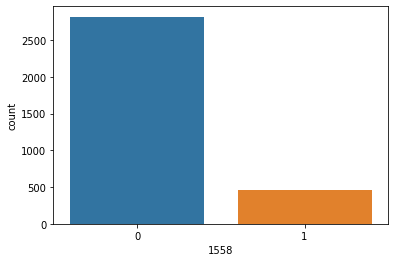

In [ ]:
print(data[1558].value_counts())
sns.countplot(data[1558])

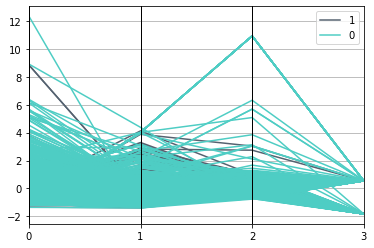

In [ ]:
from pandas.plotting import parallel_coordinates
%matplotlib inline

parallel_coordinates(df1, 1558, color=('#556270', '#4ECDC4', '#C7F464'))

In [ ]:
data[[0,1,2,3]]

,0,1,2,3
0,125.000000,125.000000,1.000000,1
1,57.000000,468.000000,8.210500,1
2,33.000000,230.000000,6.969600,1
3,60.000000,468.000000,7.800000,1
4,60.000000,468.000000,7.800000,1
...,...,...,...,...
3274,170.000000,94.000000,0.552900,0
3275,101.000000,140.000000,1.386100,1
3276,23.000000,120.000000,5.217300,1
3277,64.021886,155.344828,3.911953,1


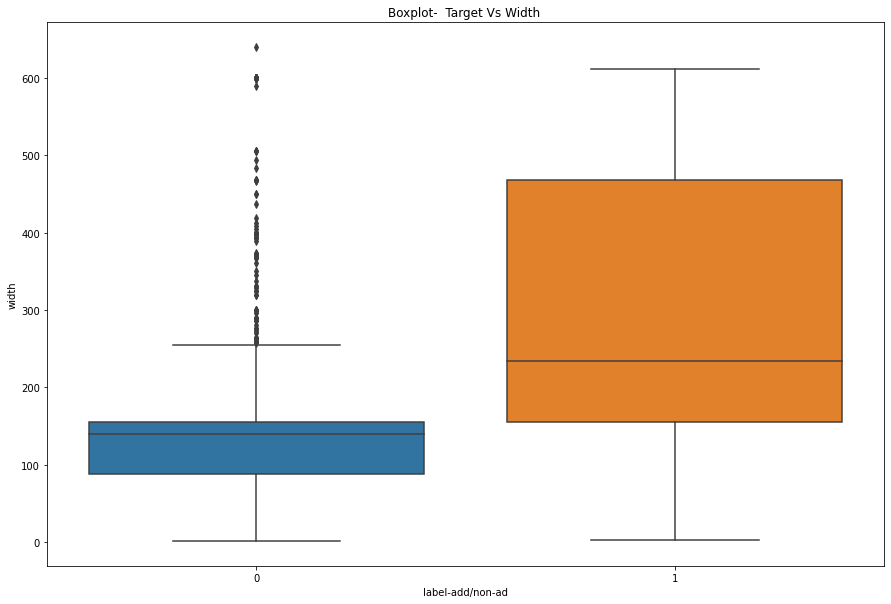

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(x=1558,y=1,data=data)
plt.xlabel('label-add/non-ad')
plt.ylabel('width')
plt.title("Boxplot-  Target Vs Width ")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.30,random_state=8)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import ensemble

rf = ensemble.RandomForestClassifier()
rf.fit(xtrain,ytrain)

RandomForestClassifier()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(ytest,rf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       852
           1       0.98      0.90      0.94       132

    accuracy                           0.98       984
   macro avg       0.98      0.95      0.97       984
weighted avg       0.98      0.98      0.98       984



In [ ]:
param_grid_rf=[
    {
    'n_estimators': [100, 200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'criterion' :['gini', 'entropy']
    }
]
param_grid_svm=[
    {
        'kernel':['linear'],'random_state':[0]
    },
     {
        'kernel':['rbf'],'random_state':[0]
     },
    
    {
        'kernel':['poly'],'degree':[1,2,3,4],'random_state':[0]
    }
]

param_grid_knn=[

    {   
        'n_neighbors':np.arange(1,50),
        'p':[2]
        
    }
]
param_grid_nb=[
    {}
]


In [ ]:
rf = ensemble.RandomForestClassifier()
clf_rf = GridSearchCV(rf, param_grid_rf, scoring ='accuracy',cv=5)
clf_rf.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 200, 500]}],
             scoring='accuracy')

In [ ]:
clf_rf.best_params_

{'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 500}

In [ ]:
clf_rf.best_score_

0.9777777777777776

In [ ]:
rff = ensemble.RandomForestClassifier(criterion= 'entropy', max_features= 'auto', n_estimators= 100)

In [ ]:
rff.fit(xtrain, ytrain)

RandomForestClassifier(criterion='entropy')

In [ ]:
print(classification_report(ytest,rff.predict(xtest)))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       852
           1       0.97      0.90      0.93       132

    accuracy                           0.98       984
   macro avg       0.98      0.95      0.96       984
weighted avg       0.98      0.98      0.98       984



In [ ]:
# ypred1 = rf.predict(xtest)
# # ypred2 = rff.predict(xtest)
# from sklearn.metrics import accuracy_score
# print(accuracy_score(ytest, ypred1))
# print(accuracy_score(ytest, ypred2))

In [ ]:
from sklearn.decomposition import PCA

import numpy as np
import matplotlib.pyplot as plt

n_components = 1558

pca = PCA(n_components=n_components).fit(x)


Text(0, 0.5, 'Fraction of total variance explained')

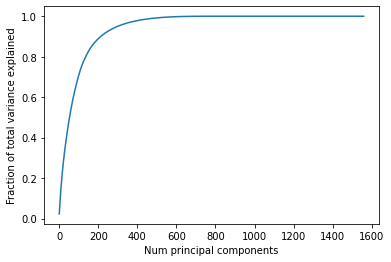

In [ ]:

num = np.arange(1,1559,1)
variance =[sum(pca.explained_variance_ratio_[:i+1])for i in range(len(pca.explained_variance_ratio_))] 
fig,ax=plt.subplots()
ax.plot(num,variance)
ax.set_xlabel('Num principal components')
ax.set_ylabel('Fraction of total variance explained')

In [ ]:
n_comp = 300
pca = PCA(n_components=n_comp).fit(xtrain)
X_train_pca = pca.transform(xtrain)
X_test_pca = pca.transform(xtest)

In [ ]:
pca_rf = ensemble.RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 500)
pca_rf.fit(X_train_pca, ytrain)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=500)

In [ ]:
y_pred_pca = pca_rf.predict(X_test_pca)
print(classification_report(ytest, y_pred_pca))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       852
           1       0.96      0.86      0.90       132

    accuracy                           0.98       984
   macro avg       0.97      0.93      0.95       984
weighted avg       0.98      0.98      0.98       984



In [ ]:
# pip install shap

In [ ]:
rfff = ensemble.RandomForestClassifier(criterion= 'entropy', max_features= 'auto', n_estimators= 100)
# x1 = x
# y1 = y
rfff.fit(xtrain,ytrain)

RandomForestClassifier(criterion='entropy')

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 575 kB 35.4 MB/s 


In [ ]:
import shap
# explainer = shap.TreeExplainer(rff)
# shap_values = explainer.shap_values(xtrain)
# print('Expected Value:', explainer.expected_value)

In [ ]:
X = data.loc[:, data.columns != 1558]
y = data.loc[:, data.columns == 1558]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
import xgboost as xgb

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


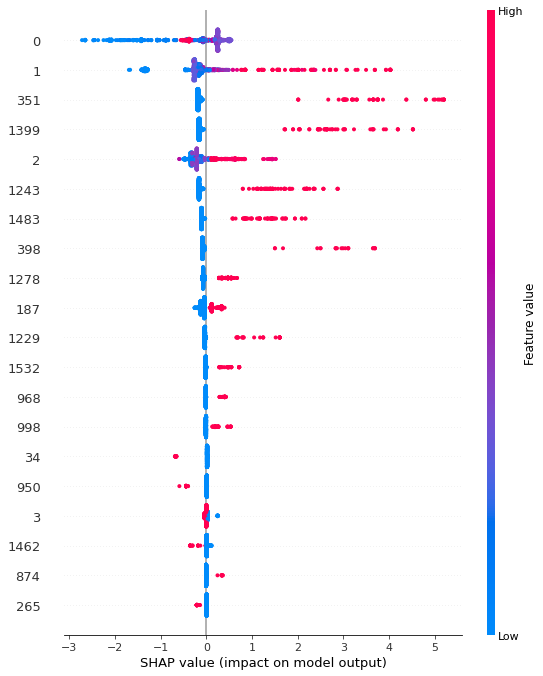

In [ ]:
xgb_model = xgb.XGBClassifier(eval_metric="mlogloss", use_label_encoder=False)
xgb_fitted = xgb_model.fit(X_train, y_train)

explainer = shap.TreeExplainer(xgb_fitted)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)

In [ ]:
y_pred_xgb = xgb_fitted.predict(X_test)
print(classification_report(y_test, y_pred_xgb ))

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       828
           1       0.96      0.77      0.85       156

    accuracy                           0.96       984
   macro avg       0.96      0.88      0.91       984
weighted avg       0.96      0.96      0.96       984



In [ ]:
explainer.expected_value

-2.5685909

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray


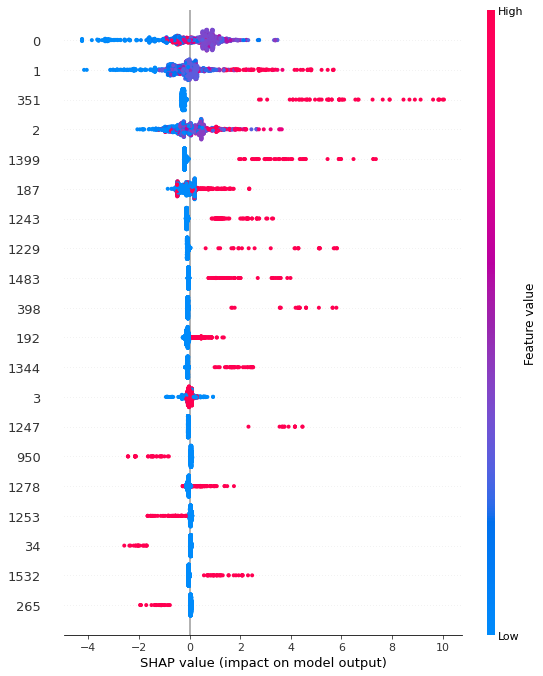

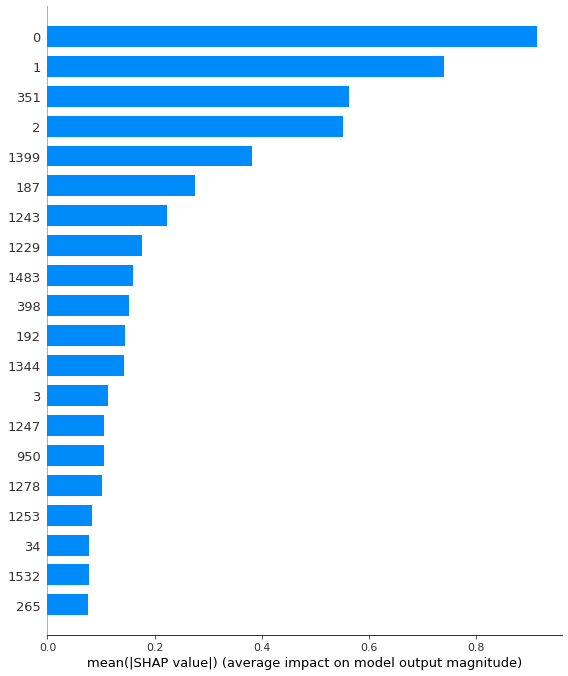

In [ ]:
import lightgbm as lgb
modell = lgb.LGBMClassifier()
modell_fitted = modell.fit(X_train, y_train)
explainer = shap.Explainer(modell_fitted)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values[1], X_test)
shap.summary_plot(shap_values[1], X_test, plot_type="bar")

In [ ]:
explainer.expected_value

[5.699904135022167, -5.699904135022167]

In [ ]:
shap.initjs()
shap.force_plot(explainer.expected_value[1],shap_values[1][0,:], X_train.iloc[1])

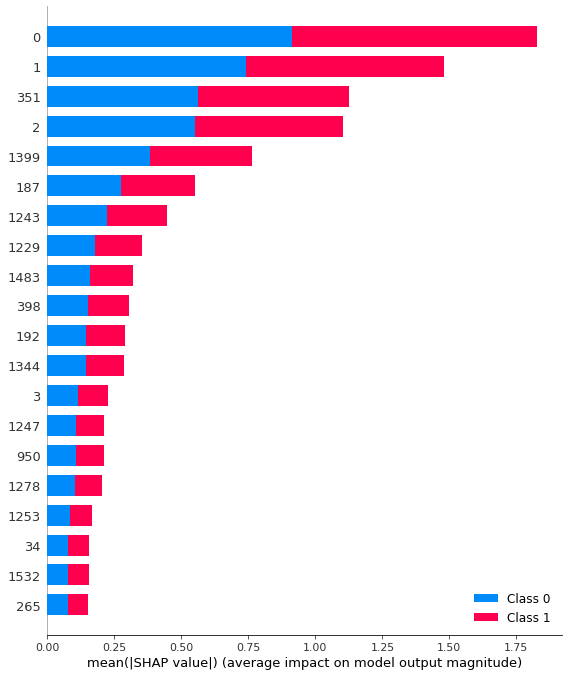

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

scaled=StandardScaler()
Xs_train=scaled.fit_transform(X_train)

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0,probability=True)
classifier.fit(Xs_train, y_train)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


SVC(kernel='linear', probability=True, random_state=0)

In [ ]:
Xs_test=scaled.fit_transform(X_test)
classifier.score(Xs_test,y_test)

0.9502032520325203

In [ ]:
# explainer1 = shap.KernelExplainer(classifier.predict_proba, Xs_train) #kernel explainer requires background dataset 
#                                                                         #which can be our train dataset. to generate perturb features
# SHAP_values1 = explainer1.shap_values(Xs_test)

In [ ]:
modell_fitted.score(X_test,y_test)


0.9664634146341463

In [ ]:
# explainer1 = shap.KernelExplainer(modell_fitted.predict_proba, X_train) #kernel explainer requires background dataset 
#                                                                         #which can be our train dataset. to generate perturb features
# SHAP_values1 = explainer1.shap_values(X_test)

In [ ]:
from sklearn import random_projection
transformer = random_projection.GaussianRandomProjection(n_components=800)
# transformer = random_projection.SparseRandomProjection(n_components=800)
X_new = transformer.fit_transform(x)
X_new.shape

(3279, 800)

In [ ]:
X_train_rp = transformer.transform(xtrain)
X_test_rp = transformer.transform(xtest)

In [ ]:
rp_rf = ensemble.RandomForestClassifier(criterion= 'entropy', max_features= 'sqrt', n_estimators= 500)
rp_rf.fit(X_train_rp, ytrain)

RandomForestClassifier(criterion='entropy', max_features='sqrt',
                       n_estimators=500)

In [ ]:
y_pred_rp = rp_rf.predict(X_test_rp)
print(classification_report(ytest, y_pred_rp))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       852
           1       0.97      0.64      0.77       132

    accuracy                           0.95       984
   macro avg       0.96      0.82      0.87       984
weighted avg       0.95      0.95      0.94       984



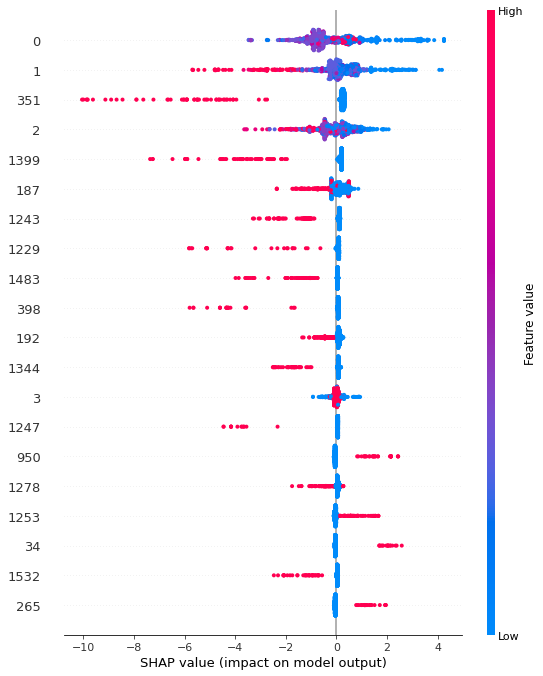

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[0], X_test)

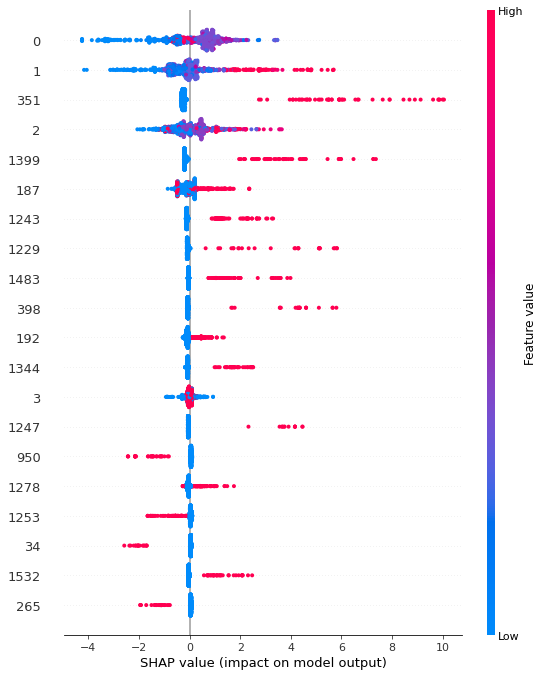

In [ ]:
shap.initjs()
shap.summary_plot(shap_values[1], X_test)